In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

In [15]:
def min_dist(points, res):
    """Calculates a 2D tensor with the minimum distance from each pixel to data.

    Inputs:
        * points: a python list of 2D coordinates, normalized in the range [0,1]
        * res: the resolution of the output tensor.
    Returns:
        A res x res square tensor with floating point values corresponding to the
        euclidean distance to the closest point in points.
    """
    points = torch.tensor(points)
    x = torch.linspace(0, 1, res)
    y = torch.linspace(0, 1, res)
    grid_x, grid_y = torch.meshgrid(x, y)
    grid_points = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1)
    points_expanded = points.unsqueeze(0).expand(grid_points.size(0), -1, -1)
    dist = torch.norm(grid_points.unsqueeze(1) - points_expanded, dim=2)
    min_distances = dist.min(dim=1)[0].reshape(res, res)
    return min_distances

points = [[0.4, 0.3], [0.6, 0.7]]
res = 20
dist_tensor = min_dist(points, res)
dist_tensor



tensor([[0.5000, 0.4703, 0.4449, 0.4245, 0.4099, 0.4017, 0.4003, 0.4058, 0.4179,
         0.4361, 0.4596, 0.4877, 0.5196, 0.5546, 0.5923, 0.6066, 0.6166, 0.6308,
         0.6490, 0.6708],
        [0.4590, 0.4264, 0.3982, 0.3753, 0.3587, 0.3493, 0.3477, 0.3540, 0.3679,
         0.3884, 0.4146, 0.4455, 0.4802, 0.5180, 0.5486, 0.5546, 0.5655, 0.5810,
         0.6007, 0.6242],
        [0.4206, 0.3848, 0.3533, 0.3272, 0.3080, 0.2970, 0.2952, 0.3026, 0.3186,
         0.3421, 0.3716, 0.4058, 0.4436, 0.4842, 0.4961, 0.5028, 0.5147, 0.5317,
         0.5531, 0.5786],
        [0.3855, 0.3461, 0.3107, 0.2807, 0.2581, 0.2449, 0.2426, 0.2516, 0.2707,
         0.2980, 0.3314, 0.3694, 0.4106, 0.4424, 0.4436, 0.4511, 0.4644, 0.4831,
         0.5066, 0.5343],
        [0.3548, 0.3116, 0.2717, 0.2368, 0.2095, 0.1930, 0.1901, 0.2014, 0.2248,
         0.2570, 0.2952, 0.3372, 0.3819, 0.3898, 0.3912, 0.3996, 0.4146, 0.4354,
         0.4614, 0.4916],
        [0.3297, 0.2827, 0.2380, 0.1973, 0.1635, 0.1417, 0.1

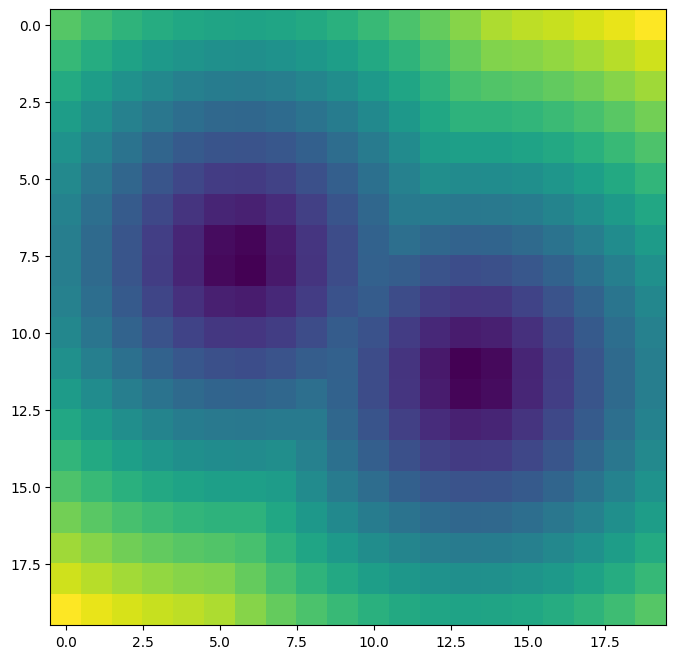

In [16]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

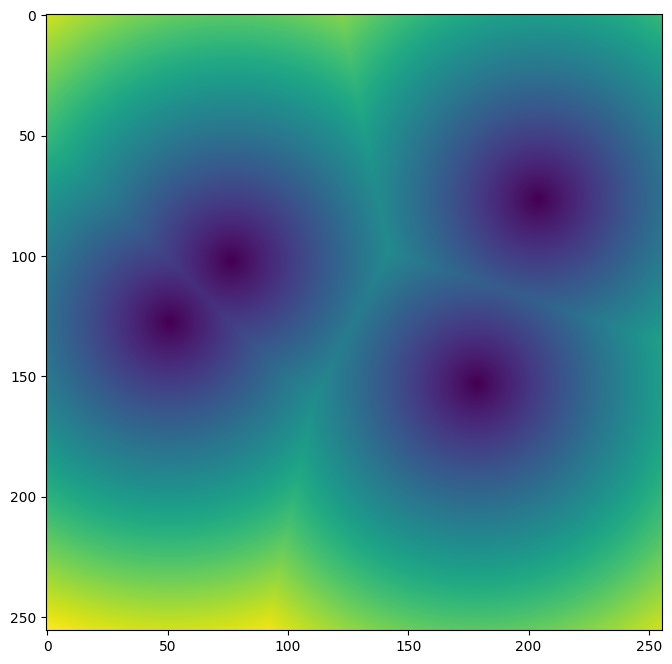

In [17]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

Batched **version**

In [18]:
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  values = np.random.randint(0, 10, batch_size*num_points).reshape(batch_size, num_points)
  values = np.expand_dims(values, 2)
  points = np.concatenate((coords, values), axis=2)
  return points

In [20]:
def min_dist(points, res):
    """Calculates a 3D tensor with the minimum distance from each pixel to data.

    Inputs:
        * points: a numpy array of 2D coordinates and point values, normalized to
                  be in the range [0,1]. The expected shape is [B, P, 3].
        * res: the resolution of the output tensor.
    Returns:
        A res x res square tensor with floating point values corresponding to the
        euclidean distance to the closest point in points. The return tensor
        shape is [B, res, res].
    """
    B, P, _ = points.shape
    x = np.linspace(0, 1, res)
    y = np.linspace(0, 1, res)
    grid_x, grid_y = np.meshgrid(x, y)
    grid_points = np.stack([grid_x.flatten(), grid_y.flatten()], axis=1)
    grid_points_batch = np.repeat(grid_points[np.newaxis, :, :], B, axis=0)
    points_2d = points[:, :, :2]
    diff = grid_points_batch[:, :, np.newaxis, :] - points_2d[:, np.newaxis, :, :]
    dist_squared = np.sum(diff ** 2, axis=-1)
    min_distances = np.sqrt(np.min(dist_squared, axis=-1))
    min_distances = min_distances.reshape(B, res, res)
    return min_distances


In [11]:
#Testing the function
batch_size = 3
num_points = 4

#Creating Points
points = create_points(batch_size, num_points)
print(points.shape)
res = 25  #resolution = 25
distances = min_dist(points, res)
print(distances.shape)

(3, 4, 3)
(3, 25, 25)


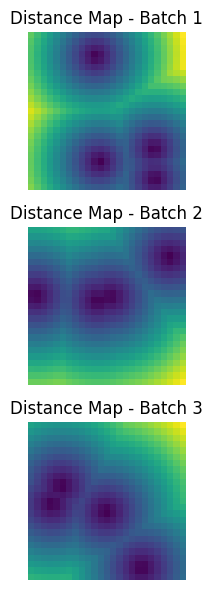

In [12]:
fig, axs = plt.subplots(batch_size, 1, figsize=(6, 6))
for i in range(batch_size):
    axs[i].imshow(distances[i], cmap='viridis')
    axs[i].set_title(f'Distance Map - Batch {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()